# Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by https://www.codecademy.com/.

The data for this project is *inspired* by real data.

## Import Python Modules
Here are the primary modules that will be used in this project:

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting data to know

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [147]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
print("Columns:",species.columns)
species.head().style.set_caption("Species DataFrame Head").background_gradient(cmap='viridis')

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,nan
1,Mammal,Bos bison,"American Bison, Bison",nan
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle",nan
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",nan
4,Mammal,Cervus elaphus,Wapiti Or Elk,nan


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [172]:
observations=pd.read_csv('observations.csv',encoding='utf-8')
print("Columns:",observations.columns)
observations.head().style.set_caption("Conservations DataFrame Head").background_gradient(cmap='viridis')





Columns: Index(['scientific_name', 'park_name', 'observations'], dtype='object')


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

Dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [150]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


# Exploring data
Exploring the `species` data a little more in depth.Finding the number of distinct species in the data.Column `scientific_name` have 5,541 unique species. There seems to be a lot of species in the national parks!

In [170]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


Unique `categories`

In [158]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Amount of each `category`

In [161]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Combining both tables together and create one table depending on their scientific name

In [174]:
combined = pd.merge(observations, species, on='scientific_name', how='left')
combined.head()
print("Columns:",combined.columns)

Columns: Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')


Lets find out Least observed and Most observed animal

In [167]:
least_obs_idx = combined['observations'].idxmin()
most_obs_idx = combined['observations'].idxmax()

least_observed = combined.loc[least_obs_idx]
most_observed = combined.loc[most_obs_idx]

print("Least Observed Animal:")
print(least_observed[['common_names', 'scientific_name', 'observations', 'park_name', 'category', 'conservation_status']])
print("\nMost Observed Animal:")
print(most_observed[['common_names', 'scientific_name', 'observations', 'park_name', 'category', 'conservation_status']])


Least Observed Animal:
common_names           Golden Corydalis, Scrambled Eggs
scientific_name                         Corydalis aurea
observations                                          9
park_name                           Bryce National Park
category                                 Vascular Plant
conservation_status                                 NaN
Name: 10368, dtype: object

Most Observed Animal:
common_names           Deep-Root Clubmoss, Ground Cedar
scientific_name                  Lycopodium tristachyum
observations                                        321
park_name                     Yellowstone National Park
category                                 Vascular Plant
conservation_status                                 NaN
Name: 12447, dtype: object


Lets check conservation status to find out is there any endangered species out there,and what kind of conservation status is existing

In [181]:
not_nan_conservation = combined[combined['conservation_status'].notna()]

print("Number of rows with conservation_status values:", not_nan_conservation.shape[0])

print("Unique conservation statuses:", not_nan_conservation['conservation_status'].unique())

Number of rows with conservation_status values: 880
Unique conservation statuses: ['Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

Finding out exact amount of each conservation status

A lot of values is  `NaN` so i convert them to `No Intervention` 

In [284]:
combined.fillna('No Intervention', inplace=True)
combined.groupby("conservation_status").size()

conservation_status
Endangered               80
In Recovery              24
No Intervention       24752
Species of Concern      732
Threatened               44
dtype: int64

In [ ]:
Building a pie chart having this data including only info that we have

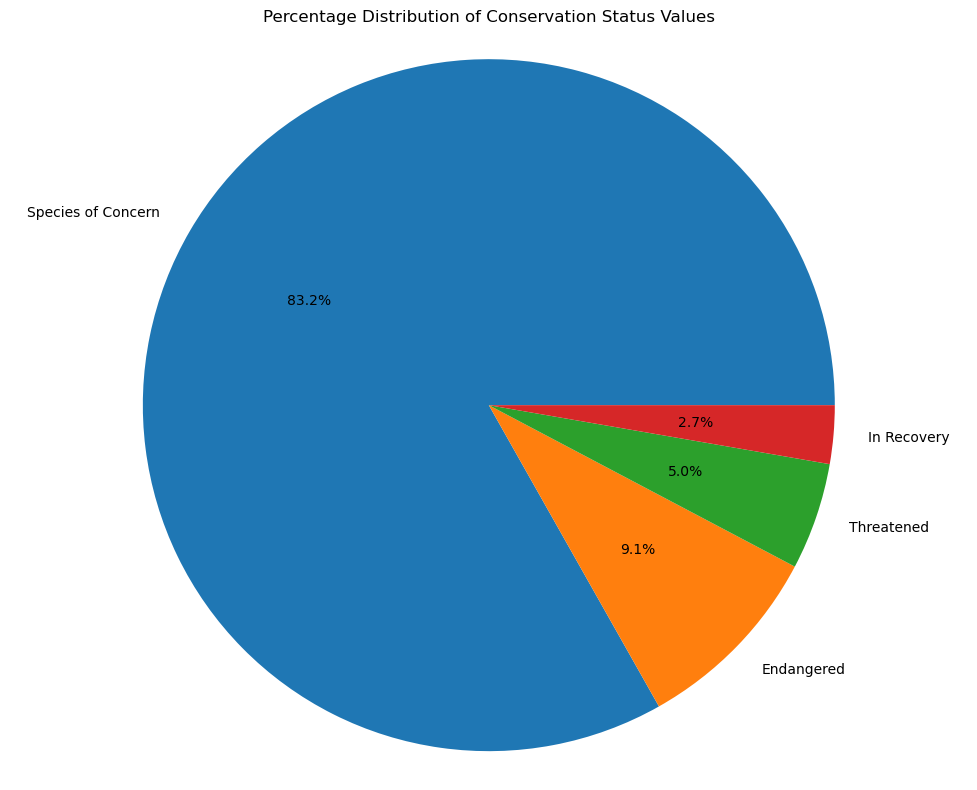

In [186]:
status_counts = not_nan_conservation['conservation_status'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(status_counts.values,labels=status_counts.index,autopct='%1.1f%%')
plt.title("Percentage Distribution of Conservation Status Values")
plt.axis('equal')  
plt.tight_layout()
plt.show()


Finding out which category of animals in each conservation status

In [286]:
conservationCategory = combined[combined.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,44.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,12.0,NaN,NaN,NaN
Species of Concern,16.0,320.0,16.0,168.0,20.0,20.0,172.0
Threatened,8.0,NaN,20.0,8.0,NaN,NaN,8.0


Building stacked bar chart depending on this

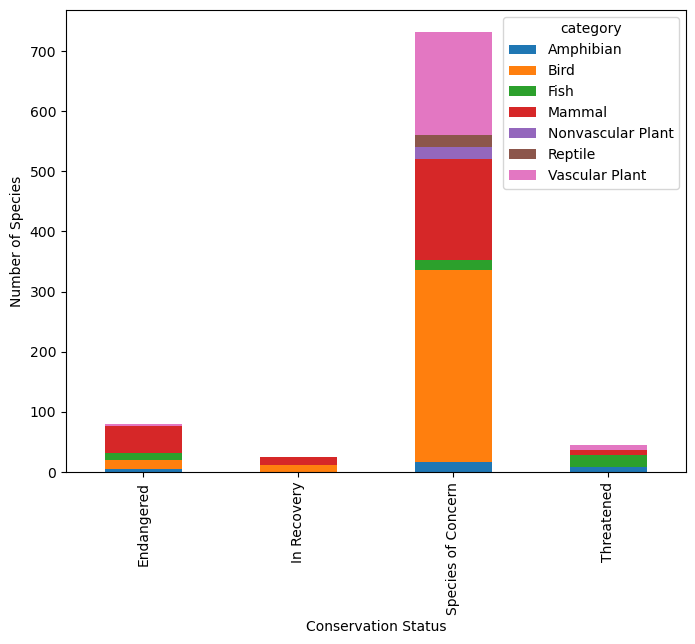

In [219]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show();

Finding if certain types of species are more likely to be endangered.To do so I created new column called `is_protected` that will include any species that had value other than no `No Intevention`

In [222]:
combined['is_protected'] = combined.conservation_status != 'No Intervention'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [228]:
category_counts = combined.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Calculating rate of protection

In [233]:
category_counts['percent_protected'] = category_counts.protected /\
(category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates.
The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [237]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.
This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [240]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.038355590229699, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

## National Parks
Lets see all unique national parks and everything related to it

In [197]:
unique_categories = combined.groupby('park_name')['category'].nunique()
print(f"All Parks:{combined.park_name.unique()}")
print(f"Total number of observations:{combined.observations.sum()}")

All Parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Total number of observations:3645247


Lets make bar chart from them:

Bar Chart: Unique Parks and Amount of different species per each park

As we can see that each park have same amount of species per park which can happen beacause the data is artificial in other case that would be really strange on real data.

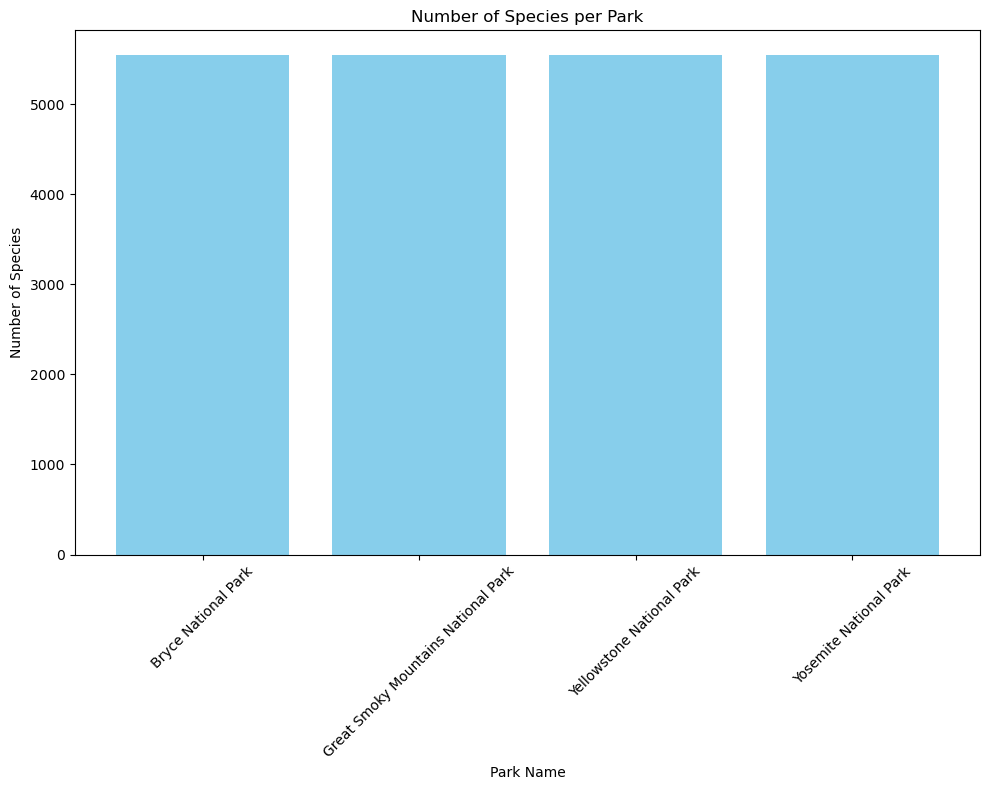

In [82]:
species_count = combined.groupby('park_name')['scientific_name'].nunique()

plt.figure(figsize=(10, 8))
plt.bar(species_count.index, species_count.values, color='skyblue')

plt.xlabel("Park Name")
plt.ylabel("Number of Species")
plt.title("Number of Species per Park")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Bar Chart: Unique Parks vs. Most Popular Category Count
Same thing here but for plants to be popular is explainable

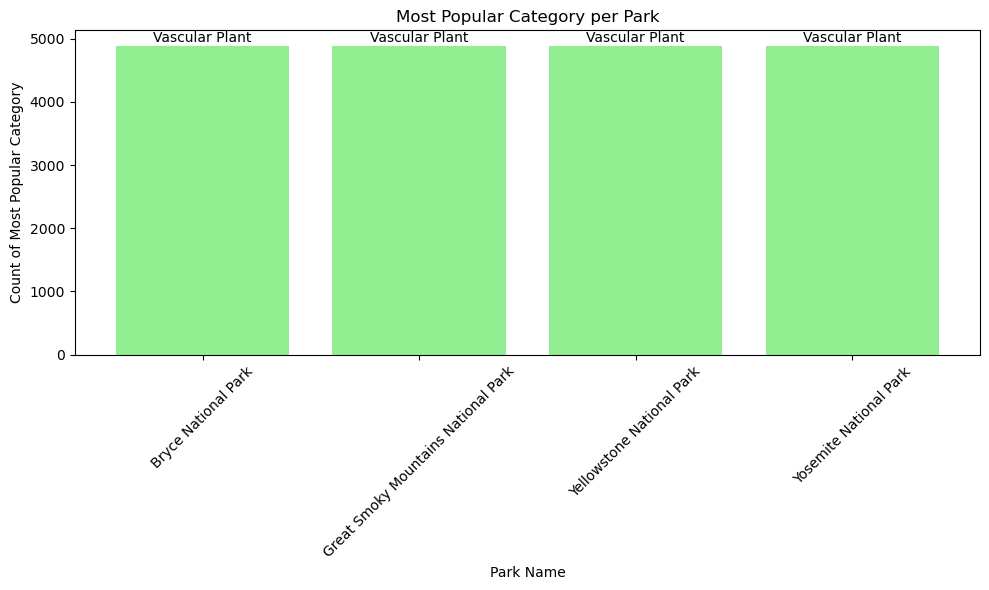

In [86]:
category_counts = combined.groupby(['park_name', 'category']).size().reset_index(name='count')

most_popular = category_counts.loc[category_counts.groupby('park_name')['count'].idxmax()]

plt.figure(figsize=(10, 6))
bars = plt.bar(most_popular['park_name'], most_popular['count'], color='lightgreen')

plt.xlabel("Park Name")
plt.ylabel("Count of Most Popular Category")
plt.title("Most Popular Category per Park")
plt.xticks(rotation=45)


for index, row in most_popular.iterrows():
    plt.text(row['park_name'],row['count'] + 5,row['category'],ha='center',va='bottom')

plt.tight_layout()
plt.show()


So making our observations we can say that most popular category per park is `Vascular plant` and each park has over `5000 species`


#### Species in Parks
The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.
The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [268]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = combined[combined.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['American', 'Mink'],
 ['Northern', 'Short', 'Tailed', 'Shrew', 'Northern', 'ShortTailed', 'Shrew'],
 ['WhiteTailed', 'Deer'],
 ['WhiteTailed', 'Deer', 'WhiteTailed', 'Deer'],
 ['Panther', 'Mountain', 'Lion'],
 ['Cougar', 'Mountain', 'Lion', 'Puma']]

Clean duplicates

In [271]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['American', 'Mink'],
 ['Northern', 'Short', 'Tailed', 'Shrew', 'ShortTailed'],
 ['WhiteTailed', 'Deer'],
 ['WhiteTailed', 'Deer'],
 ['Panther', 'Mountain', 'Lion'],
 ['Cougar', 'Mountain', 'Lion', 'Puma']]

Putting everything into one list,and the counting most popular

In [274]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res
res[:6]

['American', 'Mink', 'Northern', 'Short', 'Tailed', 'Shrew']

In [276]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
21,Bat,144
32,Myotis,108
98,Shrew,104
54,American,96
184,Mouse,72
80,Mountain,68
74,Common,64
144,Gray,64
119,Chipmunk,60
33,Brown,56


From this analysis, it seems that most popular is `Bats`,`Myotis` and `Shrews`, so `Bat` occurred 144 times, `Myotis` 108 times while `Shrew` came up 104 times.

In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [293]:
combined['is_bat'] = combined.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,False
1,Mammal,Bos bison,"American Bison, Bison",NaN,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,False
9,Mammal,Canis rufus,Red Wolf,Endangered,False


Here is a subset of the data where is_bat is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species.

In [295]:
combined[combined.is_bat]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
286,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
331,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
450,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
670,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
827,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
25460,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
25461,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
25476,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
25530,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [298]:
combined[combined.is_bat].groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [303]:
obs_by_park = combined[combined.is_bat].groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Creating a bar chart based on this data

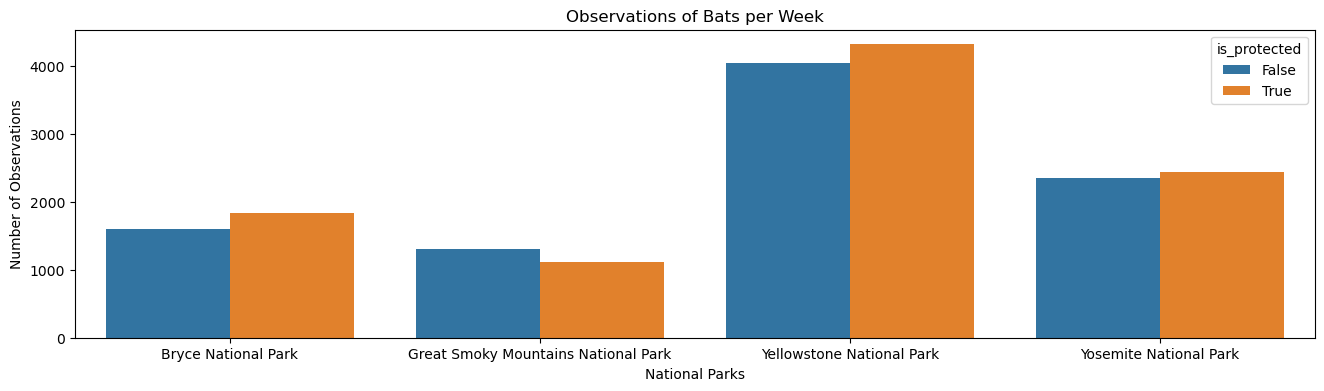

In [306]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(24752 vs 880)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
    - Found that number of species per park and most popular category is the same for all parks which proves that data is most likely to be artificial because its hard to imagine in real life

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 

Made by Alnur Nurumov